# HISTORICO DE MERCADO DE VALORES DE NINTENDO

---

#*@Autor:Fabian Camilo Salamanca R
#*@Date:2022/03/16
#*@Description:this project tries to take the price history of nintendo and apply linear and logistic regression




---
Tomaremos los datos publicados en https://finance.yahoo.com/quote/NTDOY/history?p=NTDOY

La data (CSV) tiene las siguientes columnas: Fecha - en formato: yy-mm-dd



*   OPEN-Abierto - precio de la acción en el mercado abierto (estos son datos de NYSE, así que todo en USD)
*   HIGH - Alto - Precio más alto alcanzado en el día
*   Low- Precio más bajo alcanzado en el día
*   Volumen - Número de acciones negociadas   
*   Close - valor de cierre
* Adj Close

##instalando librerias

In [ ]:
# necesitamos la libreria WIKITABLES para descargar tablas de Wikipedia (y mantener actualizada la data)
# Necesitamos la libreria FSSPEC (Interfaces de sistema de archivos para Python)
# Necesitamos la libreria  beautifulsoup4 : para raspado web altamente evolucionadas
#!pip install wikitables
!pip install fsspec
!pip install beautifulsoup4 

##Importando librerías

In [ ]:
import numpy as np              #Mejora el soporte para vectores y matrices
import pandas as pd             #Estructura de datos (Ciencia de datos)
import matplotlib.pyplot as plt #Para graficar
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D   #para graficas en 3D
import requests                           # libreria para manejar pedidos internet
from bs4 import BeautifulSoup             # libreria para parsear documentos HTML

#from wikitables import import_tables    # para descargar tablas de Wikipedia
from sklearn.decomposition import PCA   # Análisis de componentes principales (PCA).

#configuraciones basicas para PLT
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

##importando dataset

In [ ]:
df_acciones = pd.read_csv("https://raw.githubusercontent.com/fabianSalamanca/Machine_learning/main/1%20Corte/NTDOY.csv")
df_acciones.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-03-15,70.690002,71.239998,70.500000,71.180000,68.846054,509400
1,2021-03-16,73.349998,73.900002,73.000000,73.260002,70.857841,654800
2,2021-03-17,72.010002,73.500000,71.430000,73.120003,70.722435,438100
3,2021-03-18,72.199997,72.330002,71.220001,71.510002,69.165222,365400
4,2021-03-19,71.169998,72.080002,70.820000,72.080002,69.716537,538900


## conociendo y Preprocesando los datos



Vamos a usar datos semanales desde 2021 a 2022, donde cada acción tiene su propio rango de valores. Por ejemplo:


La intención de este ejercicio es agrupar las acciones por el comportamiento de sus ganancias, en vez de por su precio de mercado. De esta forma el rendimiento de cada acción es comparable con los demás.


In [ ]:
df_acciones.info()
#df_acciones.shape
#df_acciones.describe()
#df_acciones.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       254 non-null    object 
 1   Open       254 non-null    float64
 2   High       254 non-null    float64
 3   Low        254 non-null    float64
 4   Close      254 non-null    float64
 5   Adj Close  254 non-null    float64
 6   Volume     254 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


###cambiando el tipo de dato en columnas

In [ ]:
df_acciones['Date']=pd.to_datetime(df_acciones['Date'])       # Convertimos el campo DATE en tipo fecha
df_acciones = df_acciones.rename(columns={'Name':'Symbol'})   #cambiamos el nombre la col de NAME a  SYMBOL
df_acciones.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-03-15,70.690002,71.239998,70.500000,71.180000,68.846054,509400
1,2021-03-16,73.349998,73.900002,73.000000,73.260002,70.857841,654800
2,2021-03-17,72.010002,73.500000,71.430000,73.120003,70.722435,438100
3,2021-03-18,72.199997,72.330002,71.220001,71.510002,69.165222,365400
4,2021-03-19,71.169998,72.080002,70.820000,72.080002,69.716537,538900


In [ ]:
df_acciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       254 non-null    datetime64[ns]
 1   Open       254 non-null    float64       
 2   High       254 non-null    float64       
 3   Low        254 non-null    float64       
 4   Close      254 non-null    float64       
 5   Adj Close  254 non-null    float64       
 6   Volume     254 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 14.0 KB


#linear regression

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


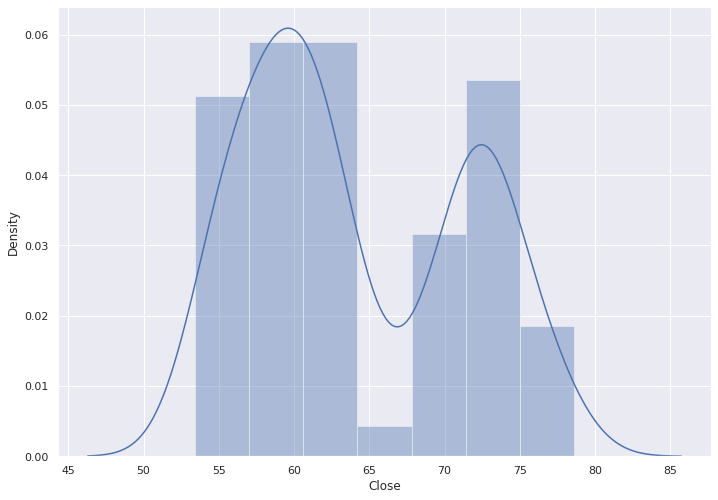

In [ ]:
sb.set(rc={'figure.figsize':(11.7,8.27)})  #tamaño del grafico
sb.distplot(df_acciones['Close'])                #agregamos los datos
plt.show()                                  #visualizamos el grafico

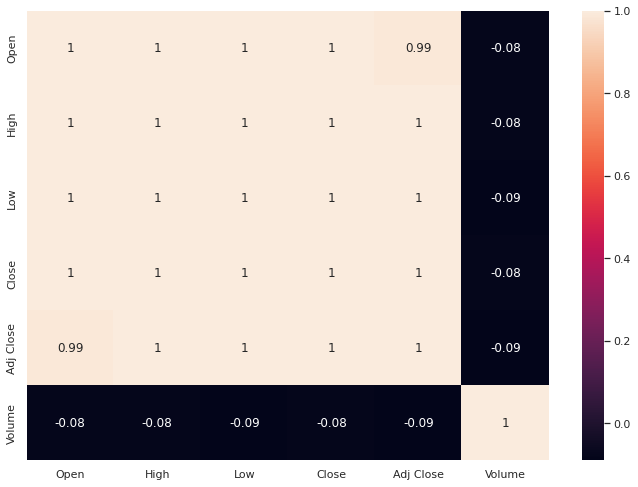

In [ ]:
#función de correlación de pandas (cercano a 1 es la mejor correlación, negativos la peor)
correlation_matrix =df_acciones.corr().round(2)
# annot = True (para imprimir los valores dentro del cuadrado)
sb.heatmap(data=correlation_matrix, annot=True)

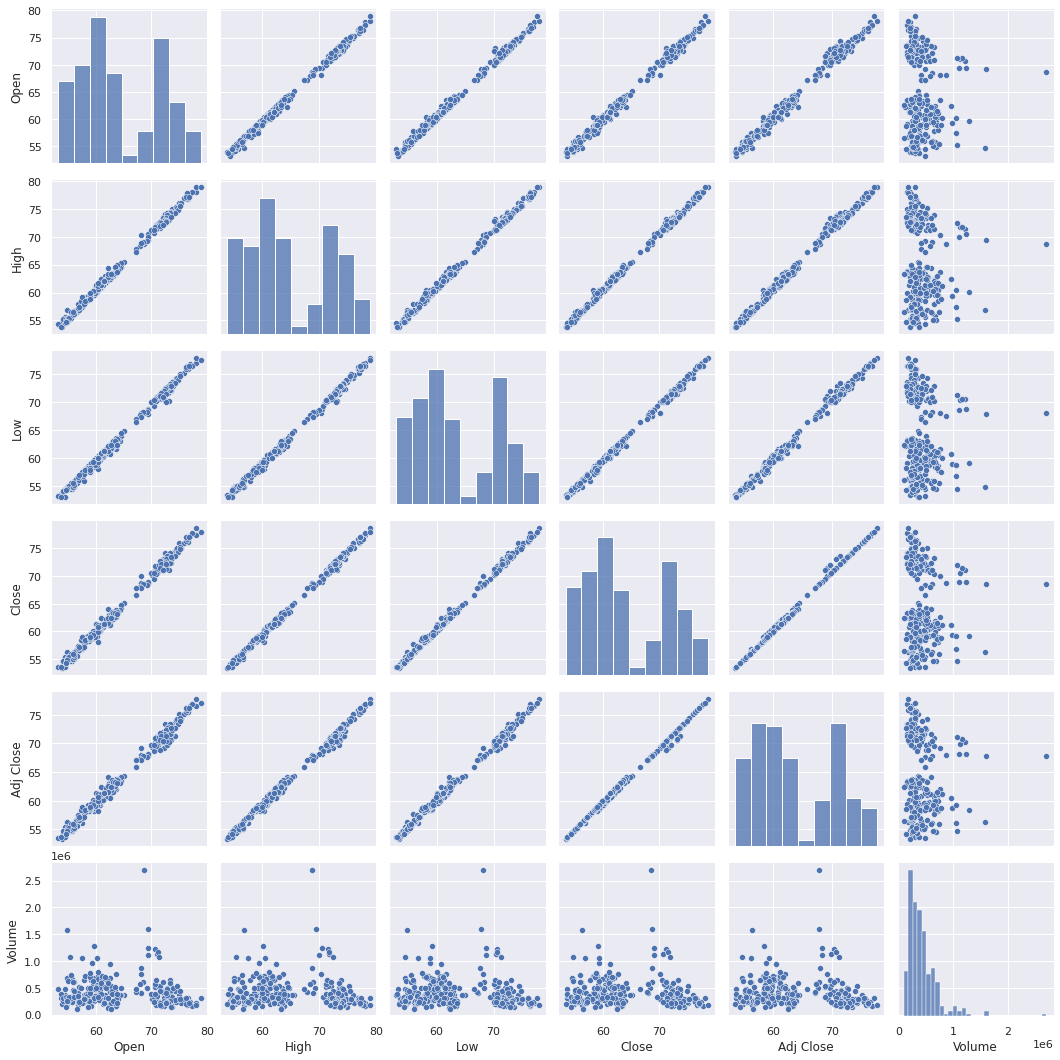

In [ ]:
sb.pairplot(df_acciones);

In [ ]:
#entrenando con dos variables en X
X = pd.DataFrame(np.c_[df_acciones['Close'], df_acciones['Open']], columns = ['Close','Open'])
Y = df_acciones['Low']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=24)
print("x75%: "+str(X_train.shape) +", x25%: "+str(X_test.shape))
print("y75%: "+str(Y_train.shape) +", y25%: "+str(Y_test.shape))

x75%: (190, 2), x25%: (64, 2)
y75%: (190,), y25%: (64,)


In [ ]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

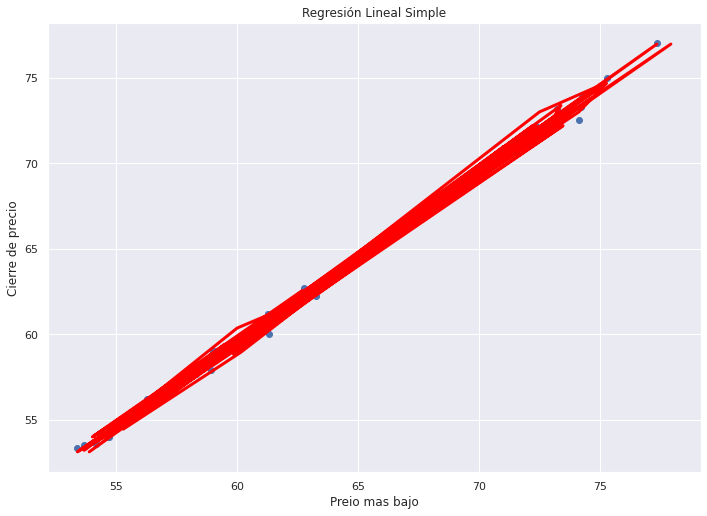


 PRESICIÓN DEL MODELO REGRESIÓN LINEAL SIMPLE
0.997795339320086


In [ ]:
# poner a prueba la maquina (modelo)
Y_pred = lin_model.predict(X_test)
plt.scatter(X_test['Close'], Y_test)
plt.plot(X_test, Y_pred, color='red', linewidth=3)
plt.title('Regresión Lineal Simple')
plt.xlabel('Preio mas bajo')
plt.ylabel('Cierre de precio')
plt.show()
print('\n PRESICIÓN DEL MODELO REGRESIÓN LINEAL SIMPLE')
print(lin_model.score(X_train, Y_train))

#logistic regression

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_regression = LogisticRegression()